<a href="https://colab.research.google.com/github/alonh1/ember-3.9/blob/master/Advanced_ML_EX2_315682773_322155516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)

### Part 2: AdaBoost implementation

1-a,b,c,d,e,f,g

In [ ]:
# Implementing AdaBoost

class AdaBoost:
    def __init__(self, n_estimators=100):
        self.n_estimators = n_estimators
        self.estimators_ = []
        self.estimator_weights_ = []

    def fit(self, X, y):
        w = np.full(X.shape[0], 1 / X.shape[0])   # Initialize weights
        for m in range(self.n_estimators):

            # Sample from the data with replacement
            sample_indices = np.random.choice(X.shape[0], size=X.shape[0],p=w, replace=True)
            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]

            # Fit a decision stump
            clf = DecisionTreeClassifier(max_depth=1)
            clf.fit(X_sampled, y_sampled)

            # Calculate weighted classification error
            pred = clf.predict(X)
            correct = [int(pred[i] != y[i]) for i in range(len(y))]
            error = np.dot(w, correct)
            error = max(error, 1e-15)       # add a small constant to avoid division by zero
            error = min(error, 1 - 1e-15)   # subtract a small constant to avoid division by zero

            # Calculate estimator weight size
            alpha_m = 0.5 * (np.log((1 - error) / error) / np.log(np.e))

            # Update weights
            w *= np.exp(-alpha_m * pred * y)
            w /= 2*np.sqrt(error*(1-error))

            # Save the current estimator and its weight
            self.estimators_.append(clf)
            self.estimator_weights_.append(alpha_m)

    def predict(self, X):
        # Make predictions using the weighted majority vote of the ensemble
        y_pred = np.zeros(X.shape[0])
        for alpha_m, clf in zip(self.estimator_weights_, self.estimators_):
            y_pred += alpha_m * clf.predict(X)
        return np.where((y_pred>0), 1, -1)

    def calc_acc(self, pred, y):
        correct = sum([int(pred[i] == y[i]) for i in range(len(y))])
        return correct/len(y)

part 1 - 2

Accuracy: 0.98


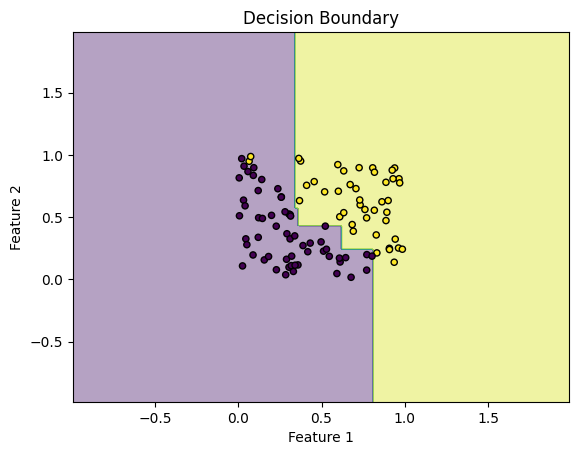

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


np.random.seed(42)

# Features
X = np.random.rand(100, 2)  # 100 data points with 2 features
# Labels
y = np.where(X[:, 0] + X[:, 1] > 1, 1, -1)

model = AdaBoost(n_estimators=10)  # Using 10 estimators for simplicity
model.fit(X, y)

y_pred = model.predict(X)

accuracy = model.calc_acc(y_pred, y)
print(f"Accuracy: {accuracy}")

import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model, X, y)


part 1 - 3

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

sklearn_adaboost = AdaBoostClassifier(n_estimators=10, random_state=42)

sklearn_adaboost.fit(X, y)

y_pred_sklearn = sklearn_adaboost.predict(X)

# Calculate the accuracy
accuracy_sklearn = accuracy_score(y, y_pred_sklearn)
print(f"Scikit-learn AdaBoost Accuracy: {accuracy_sklearn}")


Scikit-learn AdaBoost Accuracy: 1.0


### Part 2: Experiments
    

4-a,b,c

In [ ]:
def create_dataset_1():
   # Returns a split dataset with labels (y) and features (X).
   # Three features are present in the data; feature 3 is redundant and has a strong correlation with feature 1.
   # The labels rely on features 1 and 2 and are in balance.
    n_redundant = 1
    n_informative = 2
    n_samples = 1000
    n_features = 3
    mean = np.zeros(n_features)
    cov = np.eye(n_features)

    X = np.random.multivariate_normal(mean=mean, cov=cov, size=n_samples)

    for i in range(n_informative):
        mean_i = np.random.uniform(low=-1.0, high=1.0)
        var_i = np.random.uniform(low=1.0, high=2.0)
        X[:, i] += np.random.normal(loc=mean_i, scale=var_i, size=n_samples)

    for i in range(n_redundant):
        X[:, n_informative + i] += np.random.normal(loc=-0.5, scale=0.5, size=n_samples)
        X[:, n_informative + i] = X[:, i]

    y = np.ones(n_samples)*(-1)
    y[X[:, 0]*np.random.normal(loc=1, scale=1, size=n_samples) + X[:, 1]*np.random.normal(loc=1, scale=1, size=n_samples) > 0] = 1

    return X, y

def create_dataset_2():
   # Returns a split dataset with labels (y) and features (X).
   # The data contains two attributes.
   # The labels exhibit equilibrium.
    n_samples = 1000
    # Generate samples from a multivariate normal distribution around the origin
    cov_matrix = [[1,0],[0,1]]
    X = np.random.multivariate_normal([0, 0], cov_matrix, n_samples)
    # distances from the origin
    distances = np.linalg.norm(X, axis=1)
    # labels based on distance from the origin
    inner_negative_radius = 1
    outer_negative_radius = 2
    y = np.where(((distances <= inner_negative_radius) | (distances >= outer_negative_radius)), -1, 1)

    return X, y

In [ ]:
X_1, y_1 = create_dataset_1()
X_2, y_2 = create_dataset_2()
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [ ]:
print("Short EDA of datasets \n")
print("Dataset 1:")
print('Number of training samples:', len(X_1_train))
print('Number of testing samples:', len(X_1_test))
print(f'Class balance: C0={np.sum(y_1==-1)}, C1={np.sum(y_1==1)}')
print("--------------------------")
print("Dataset 2:")
print('Number of training samples:', len(X_2_train))
print('Number of testing samples:', len(X_2_test))
print(f'Class balance: C0={np.sum(y_2==-1)}, C1={np.sum(y_2==1)}')

Short EDA of datasets 

Dataset 1:
Number of training samples: 800
Number of testing samples: 200
Class balance: C0=502, C1=498
--------------------------
Dataset 2:
Number of training samples: 800
Number of testing samples: 200
Class balance: C0=540, C1=460


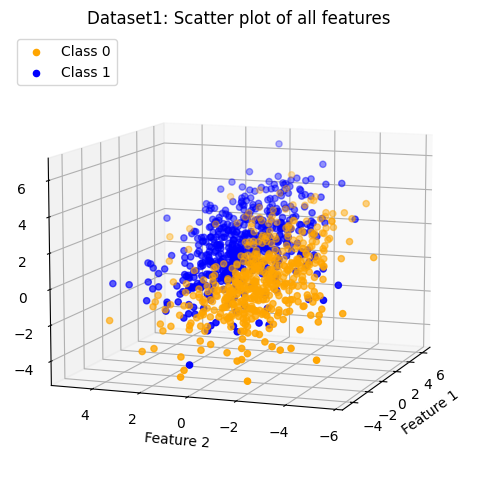

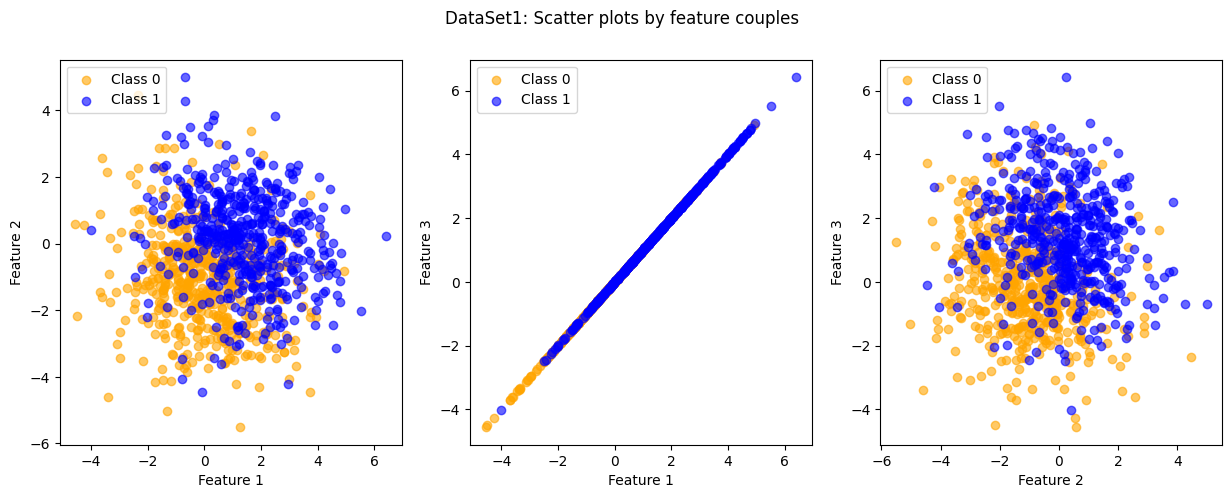

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_1[y_1==-1, 0], X_1[y_1==-1, 1], X_1[y_1==-1, 2], c='orange', label='Class 0')
ax.scatter(X_1[y_1==1, 0], X_1[y_1==1, 1], X_1[y_1==1, 2], c='b', label='Class 1')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.azim = 200
ax.elev = 10
plt.title("Dataset1: Scatter plot of all features ")
plt.legend(loc="upper left")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('DataSet1: Scatter plots by feature couples')
axs[0].scatter(X_1[y_1==-1, 0], X_1[y_1==-1, 1], c='orange', label='Class 0', alpha=0.6)
axs[0].scatter(X_1[y_1==1, 0], X_1[y_1==1, 1], c='b', label='Class 1', alpha=0.6)
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].legend(loc = "upper left")

axs[1].scatter(X_1[y_1==-1, 0], X_1[y_1==-1, 2], c='orange', label='Class 0', alpha=0.6)
axs[1].scatter(X_1[y_1==1, 0], X_1[y_1==1, 2], c='b', label='Class 1', alpha=0.6)
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 3')
axs[1].legend(loc = "upper left")

axs[2].scatter(X_1[y_1==-1, 1], X_1[y_1==-1, 2], c='orange', label='Class 0', alpha=0.6)
axs[2].scatter(X_1[y_1==1, 1], X_1[y_1==1, 2], c='b', label='Class 1', alpha=0.6)
axs[2].set_xlabel('Feature 2')
axs[2].set_ylabel('Feature 3')
axs[2].legend(loc = "upper left")

plt.show()

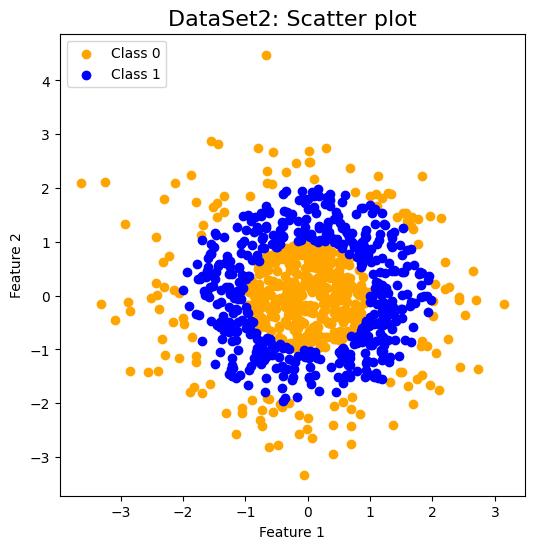

In [ ]:
# Visualization of dataset2
plt.figure(figsize=(6, 6))
plt.scatter(X_2[y_2==-1, 0], X_2[y_2==-1, 1], c='orange', label='Class 0')
plt.scatter(X_2[y_2==1, 0], X_2[y_2==1, 1], c='b', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DataSet2: Scatter plot', fontsize=16)
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Demonstrating our AdaBoost model on the datasets we generated
# Performing experiments to test the performance of our model over number of estimators hyperparameter

adaboost_train_acc_1 = []
adaboost_test_acc_1 = []
adaboost_train_acc_2 = []
adaboost_test_acc_2 = []
n_estimators = range(0,150)

for i in n_estimators:
    adaboost_clf_1 = AdaBoost(i)
    adaboost_clf_1.fit(X_1_train, y_1_train)
    adaboost_train_acc_1.append(adaboost_clf_1.calc_acc(adaboost_clf_1.predict(X_1_train), y_1_train))
    adaboost_test_acc_1.append(adaboost_clf_1.calc_acc(adaboost_clf_1.predict(X_1_test),y_1_test))

    adaboost_clf_2 = AdaBoost(i)
    adaboost_clf_2.fit(X_2_train, y_2_train)
    adaboost_train_acc_2.append(adaboost_clf_2.calc_acc(adaboost_clf_2.predict(X_2_train), y_2_train))
    adaboost_test_acc_2.append(adaboost_clf_2.calc_acc(adaboost_clf_2.predict(X_2_test),y_2_test))

In [ ]:
best_acc_1 = np.max(adaboost_test_acc_1)
best_n_est_1 = np.argmax(adaboost_test_acc_1)
best_acc_2 = np.max(adaboost_test_acc_2)
best_n_est_2 = np.argmax(adaboost_test_acc_2)

<ipython-input-17-3e0a08de6298>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Use a different style


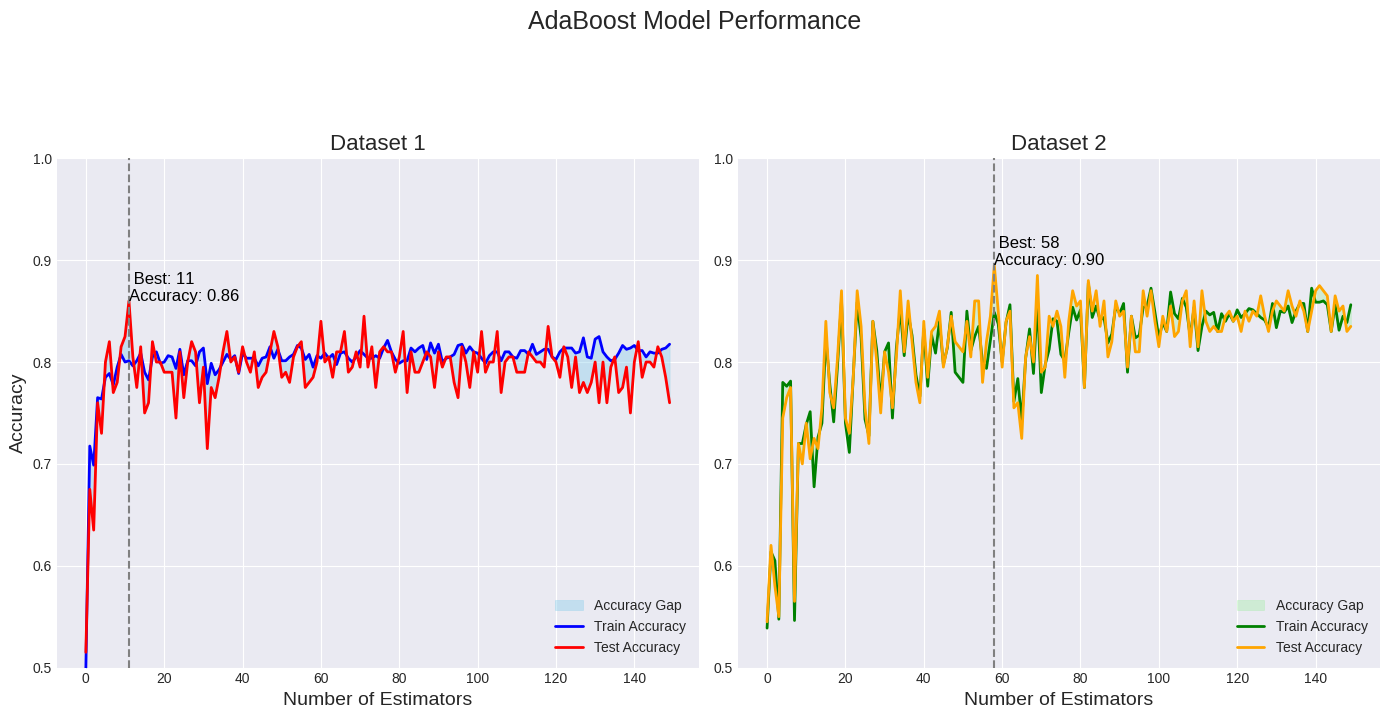

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(14, 7))

plt.suptitle('AdaBoost Model Performance', fontsize=18, y=1.05)

# Dataset 1 Plot
plt.subplot(1, 2, 1)
plt.fill_between(n_estimators, adaboost_train_acc_1, adaboost_test_acc_1, color='skyblue', alpha=0.4, label='Accuracy Gap')
plt.plot(n_estimators, adaboost_train_acc_1, label='Train Accuracy', color='blue', linewidth=2)
plt.plot(n_estimators, adaboost_test_acc_1, label='Test Accuracy', color='red', linewidth=2)
plt.xlabel('Number of Estimators', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Dataset 1', fontsize=16)
plt.legend(loc="lower right")
plt.ylim(0.5, 1)
plt.axvline(x=best_n_est_1, color='grey', linestyle='--')
plt.text(best_n_est_1, best_acc_1, f' Best: {best_n_est_1}\nAccuracy: {best_acc_1:.2f}', color='black', fontsize=12)

# Dataset 2 Plot
plt.subplot(1, 2, 2)
plt.fill_between(n_estimators, adaboost_train_acc_2, adaboost_test_acc_2, color='lightgreen', alpha=0.3, label='Accuracy Gap')
plt.plot(n_estimators, adaboost_train_acc_2, label='Train Accuracy', color='green', linewidth=2)
plt.plot(n_estimators, adaboost_test_acc_2, label='Test Accuracy', color='orange', linewidth=2)
plt.xlabel('Number of Estimators', fontsize=14)
plt.title('Dataset 2', fontsize=16)
plt.legend(loc="lower right")
plt.ylim(0.5, 1)
plt.axvline(x=best_n_est_2, color='grey', linestyle='--')
plt.text(best_n_est_2, best_acc_2, f' Best: {best_n_est_2}\nAccuracy: {best_acc_2:.2f}', color='black', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


other models

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [ ]:

def evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        "Custom AdaBoost": AdaBoost(n_estimators=best_n_est_1),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "SVM": SVC(kernel='linear', C=1.0, random_state=42)
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
    return results


# Evaluate on Dataset 1
results_dataset_1 = evaluate_models(X_1_train, y_1_train, X_1_test, y_1_test)

# Evaluate on Dataset 2
results_dataset_2 = evaluate_models(X_2_train, y_2_train, X_2_test, y_2_test)


print("Performance on Dataset 1:")
for model, accuracy in results_dataset_1.items():
    print(f"{model}: {accuracy:.4f}")

print("\nPerformance on Dataset 2:")
for model, accuracy in results_dataset_2.items():
    print(f"{model}: {accuracy:.4f}")


Performance on Dataset 1:
Custom AdaBoost: 0.8350
Random Forest: 0.7800
SVM: 0.8350

Performance on Dataset 2:
Custom AdaBoost: 0.7900
Random Forest: 0.9800
SVM: 0.5450
